# **Fast Tag Fraud Detection**

**Load Libraries **

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

**Load Dataset**

In [47]:
df = pd.read_csv('/content/FastagFraudDetection.csv')

In [48]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [49]:
df.head(5)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [52]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [53]:
df.shape

(5000, 13)

**Convert 'Timestamp' column to datetime**

In [54]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [55]:
df.isnull()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [56]:
print("Missing values in 'FastagID':", df['FastagID'].isnull().sum())

Missing values in 'FastagID': 549


In [57]:
df = df.dropna(subset=['FastagID'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         4451 non-null   int64         
 1   Timestamp              4451 non-null   datetime64[ns]
 2   Vehicle_Type           4451 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            4451 non-null   object        
 5   Lane_Type              4451 non-null   object        
 6   Vehicle_Dimensions     4451 non-null   object        
 7   Transaction_Amount     4451 non-null   int64         
 8   Amount_paid            4451 non-null   int64         
 9   Geographical_Location  4451 non-null   object        
 10  Vehicle_Speed          4451 non-null   int64         
 11  Vehicle_Plate_Number   4451 non-null   object        
 12  Fraud_indicator        4451 non-null   object        
dtypes: 

**Histogram**

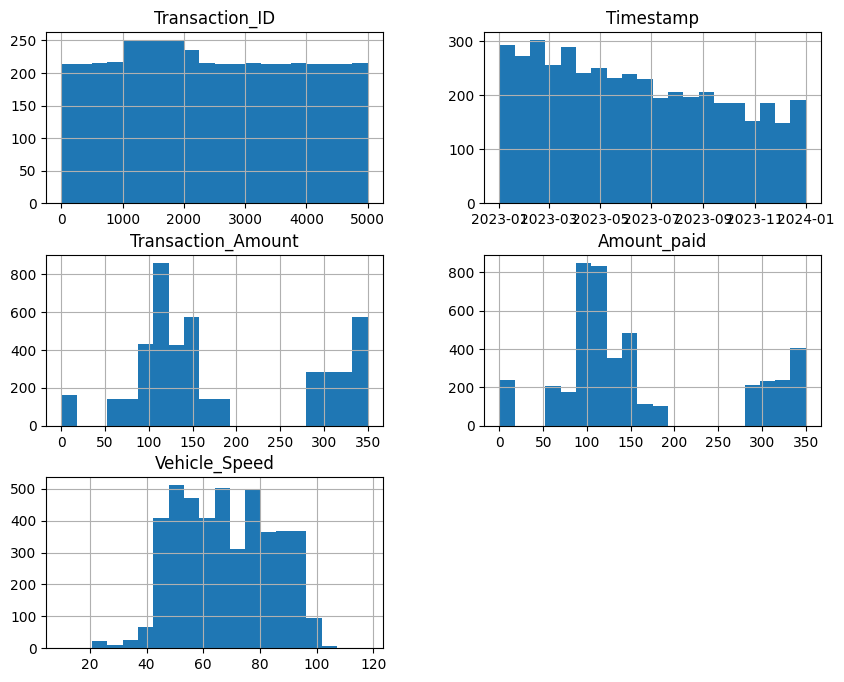

In [59]:
df.hist(figsize=(10, 8), bins=20)
plt.show()

**Count of Fraud and Non_Fraud Indicators** **bold text**

<ipython-input-60-4078af13d396>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud_indicator', data=df, palette=['yellow', 'Blue'])


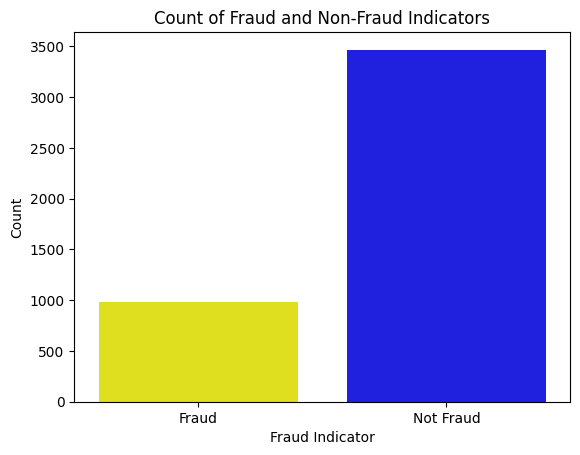

In [60]:
sns.countplot(x='Fraud_indicator', data=df, palette=['yellow', 'Blue'])
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.title('Count of Fraud and Non-Fraud Indicators')
plt.show()

**Pairwise scatter plots for numerical variables**

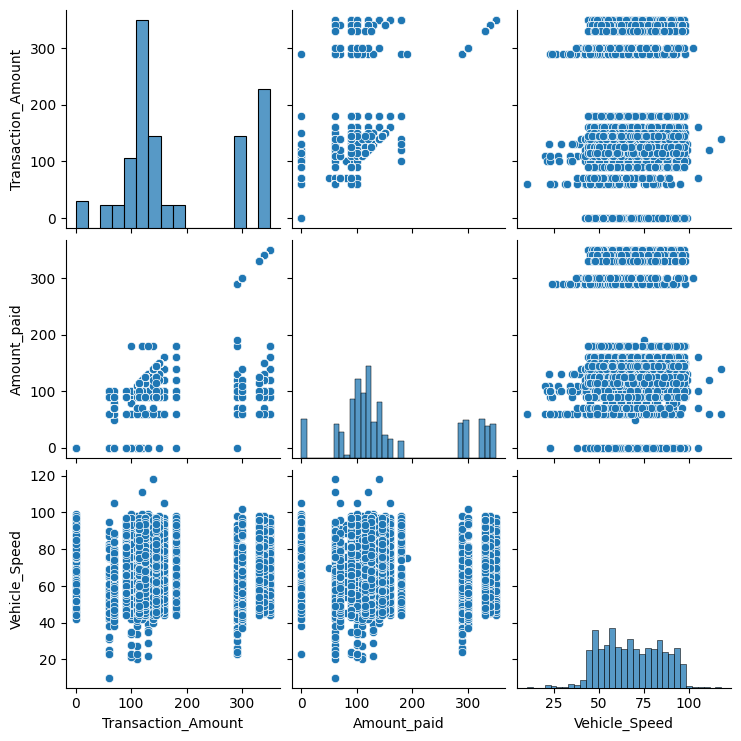

In [61]:

sns.pairplot(df, vars=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'])
plt.show()


**Box plot for 'Transaction_Amount' and 'Amount_paid'**

<ipython-input-62-6f19be653699>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


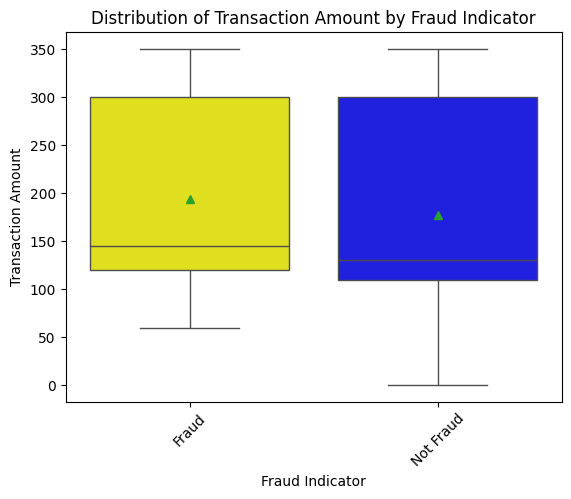

In [62]:
sns.boxplot(
    x = "Fraud_indicator",
    y = "Transaction_Amount",
    showmeans=True,
    data=df,
    palette=["yellow", "blue"]
)

plt.xlabel("Fraud Indicator")
plt.ylabel("Transaction Amount")
plt.title("Distribution of Transaction Amount by Fraud Indicator")
plt.xticks(rotation=45)
plt.show()

**Correlation matrix and heatmap for numerical variables**

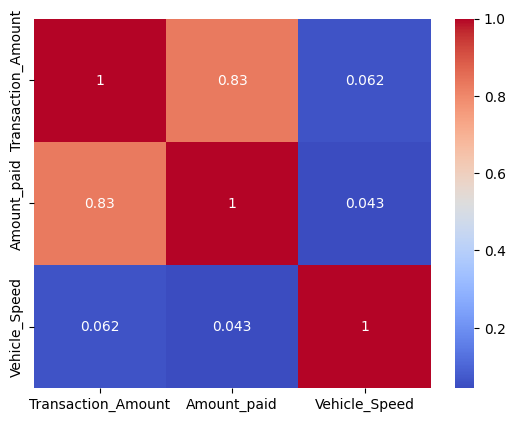

In [63]:
correlation_matrix = df[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**Histogram of 'Transaction_Amount'**

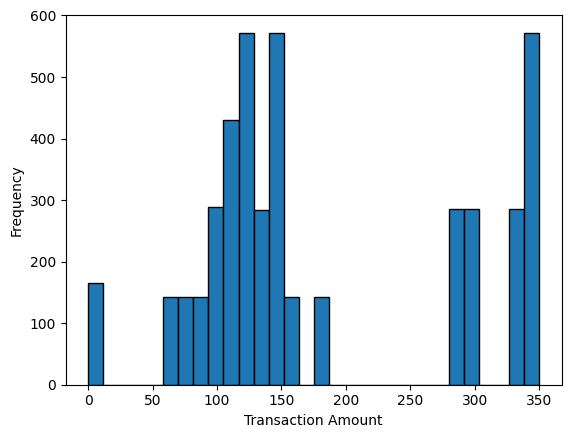

In [64]:
plt.hist(df['Transaction_Amount'], bins=30, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

**Scatter plot with regression line between 'Transaction_Amount' and 'Amount_paid'**

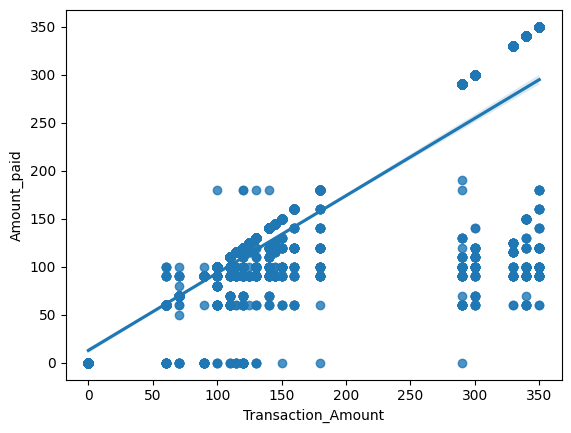

In [65]:
sns.regplot(x='Transaction_Amount', y='Amount_paid', data=df)
plt.show()

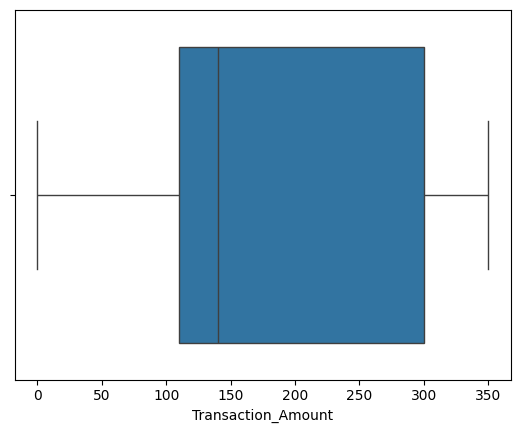

In [66]:
sns.boxplot(x='Transaction_Amount', data=df)
plt.show()

**Select features Transaction_Amount, Amount_paid**

In [67]:
selected_features = ['Transaction_Amount', 'Amount_paid']
X = df[selected_features]
y = df['Fraud_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scaling and encoding output**


In [68]:
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

**Neural network model**


In [69]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [70]:
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                96        
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
89/89 [==============================] - 1s 5ms/step - loss: 0.5603 - accuracy: 0.8121 - val_loss: 0.4672 - val_accuracy: 0.8511
Epoch 2/10
89/89 [==============================] - 0s 3ms/step - loss: 0.3789 - accuracy: 0.8571 - val_loss: 0.3123 - val_accuracy: 0.8708
Epoch 3/10
89/89 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.8883 - val_loss: 0.2310 - val_accuracy: 0.8975
Epoch 4/10
89/89 [==============================] - 0s 3ms/step - loss: 0.1970 - accuracy: 0.9206 - val_loss: 0.1816 - val_accuracy: 0.9368
Epoch 5/10
89/89 [==============================] - 0s 3ms/step - loss: 0.1559 - accuracy: 0.9473 - val_loss: 0.1504 - val_accuracy: 0.9607
Epoch 6/10
89/89 [==============================] - 0s 3ms/step - loss: 0.1285 - accuracy: 0.9547 - val_loss: 0.1319 - val_accuracy: 0.9719
Epoch 7/10
89/89 [==============================] - 0s 3ms/step - loss: 0.1096 - accuracy: 0.9652 - val_loss: 0.1142 - val_accuracy: 0.9719
Epoch 8/10
89/89 [==

**Print accuracy metrics**

In [72]:
y_pred_prob = model.predict(X_test_scaled)
# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)
# Print accuracy metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
# Print accuracy metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

28/28 [==============================] - 0s 2ms/step
Accuracy: 98.43%
Precision: 98.04%
Recall: 100.00%
F1 Score: 99.01%


**Accuracy metrics graph**


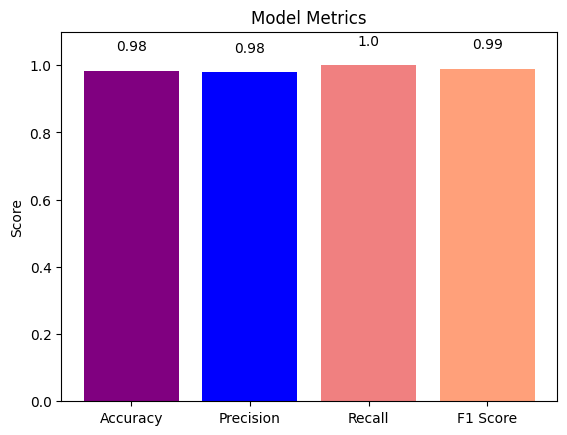

In [77]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Define custom colors for bars and text
bar_colors = ['purple', 'blue', 'lightcoral', 'lightsalmon']
plt.bar(metrics, values, color=bar_colors)

# Adding values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', va='bottom')

plt.ylabel('Score')
plt.title('Model Metrics')
plt.ylim(0, 1.1)
plt.show()